In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

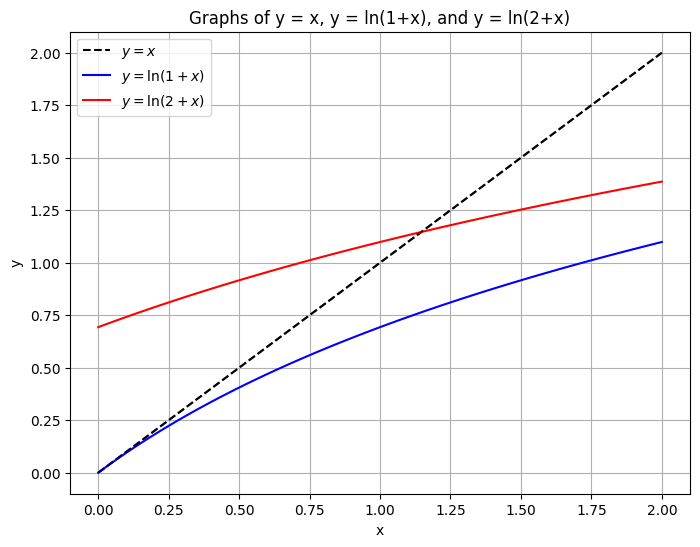

In [3]:
x = np.linspace(0, 2, 100)
y_identity = x 
y_ln1 = np.log(x+1)
y_ln2 = np.log(x+2)

plt.figure(figsize=(8, 6))
plt.plot(x, y_identity, label=r'$y = x$', linestyle='dashed', color='black')
plt.plot(x, y_ln1, label=r'$y = \ln(1 + x)$', color='blue')
plt.plot(x, y_ln2, label=r'$y = \ln(2 + x)$', color='red')

plt.plot(x, x, 'k--', alpha=0.5)  

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphs of y = x, y = ln(1+x), and y = ln(2+x)')
plt.legend()
plt.grid()

plt.show()


### Фіксовані точки  

- **Для $\ln(1+x)$:**  
  Фіксована точка визначається рівнянням $x = \ln(1 + x)$. Графічно це відповідає точці перетину кривої $\ln(1+x)$ із прямою $y = x$. У цьому випадку перетин відбувається при $x = 0$, що є єдиною фіксованою точкою на відрізку $[0,2]$.  

- **Для $\ln(2+x)$:**  
  Розв’язок рівняння $x = \ln(2 + x)$ знаходиться приблизно при $x \approx 1.1$. Це означає, що саме ця точка є фіксованою на відрізку $[0,2]$, оскільки саме тут крива $\ln(2 + x)$ перетинається з прямою $y = x$.

In [4]:
max_iter = 100

In [5]:
def g1(x):
    return 0.5 * (x - np.log(1 + x)) ** 2

def g2(x):
    return 0.5 * (x - np.log(2 + x)) ** 2

In [ ]:
def g1_first_der(x):
    return (x - np.log(1 + x)) * (1 - 1 / (1 + x))

def g2_first_der(x):
    return (x - np.log(2 + x)) * (1 - 1 / (2 + x))



In [ ]:
def g1_second_der(x):
    return (x**2 + x - np.log(1 + x)) / (1 + x) ** 2

def g2_second_der(x):
    return (((1 + x) ** 2) + (x - np.log(2 + x))) / (2 + x) ** 2



In [8]:
x_vals = np.linspace(0, 2, 100)

L1 = np.max(np.abs(g1_second_der(x_vals)))
L2 = np.max(np.abs(g2_second_der(x_vals)))

L1, L2

(np.float64(0.5445986345924322), np.float64(0.6008566024300068))

In [ ]:
x0_g1 = 0.5
x0_g2 = 1.5

x0 = [x0_g1, x0_g2]

In [13]:
learning_rate_g1 = 1 / L1
learning_rate_g2 = 1 / L2

learning_rates = [learning_rate_g1, learning_rate_g2]

In [ ]:
def grad_descent(x_start, learning_rate, max_iter, g_der_func, g_func):
    history = []
    x = x_start
    for i in range(max_iter):
        grad = g_der_func(x)
        new_x = x - learning_rate * grad
        if np.isnan(new_x).any() or np.isinf(new_x).any():
            return x, i, history
        if i % 10 == 0: 
            history.append(g_func(x))
        x = new_x
    return x, i, history

In [40]:
def calculate_objective(x0, learning_rate, max_iter, g_deriv, g_func):
    times = []
    gobal_min = []
    
    start = time.time()  
    x, i, history = grad_descent(x0, learning_rate, max_iter, g_deriv, g_func) 
    end = time.time()  

    times.append(end - start)
    gobal_min.append(x)
    

    return times, i, gobal_min, history

In [41]:
times, iterations, global_min, history = calculate_objective(x0_g1, learning_rate_g1, max_iter, g1_first_der, g1)
times2, iterations2, global_min2, history2 = calculate_objective(x0_g2, learning_rate_g2, max_iter, g2_first_der, g2)
objective_values1 = [ g1(x) for x in global_min]
objective_values2 = [g2(x) for x in global_min]

print("Objective Values: ", objective_values1)
print("Learning Rate: ", learning_rates)
print("Time: ", times)  
print("Iterations: ", iterations)
print("Global Min: ", global_min)


Objective Values:  [np.float64(4.678774371845406e-06)]
Learning Rate:  [np.float64(1.8362146661428596), np.float64(1.664290607702008)]
Time:  [0.0008571147918701172]
Iterations:  99
Global Min:  [np.float64(0.08027028213431338)]


In [42]:
print("Objective Values: ", objective_values2)
print("Learning Rate: ", learning_rates)
print("Time: ", times2)  
print("Iterations: ", iterations2)
print("Global Min: ", global_min2)

Objective Values:  [np.float64(0.21270038618766887)]
Learning Rate:  [np.float64(1.8362146661428596), np.float64(1.664290607702008)]
Time:  [0.0010328292846679688]
Iterations:  99
Global Min:  [np.float64(1.1461932206205825)]


In [33]:
print(history)
print(history2)

[[np.float64(0.004468422892500524), np.float64(0.0003437863655579651), np.float64(0.00010842310175250375), np.float64(5.124743472608475e-05), np.float64(2.94350258072831e-05), np.float64(1.896351104823648e-05), np.float64(1.3177430062795408e-05), np.float64(9.660893413082099e-06), np.float64(7.371353963908311e-06), np.float64(5.800906395464712e-06)]]
[[np.float64(0.030563074873611182), np.float64(1.693066781834875e-15), np.float64(1.9526772594548858e-28), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]]


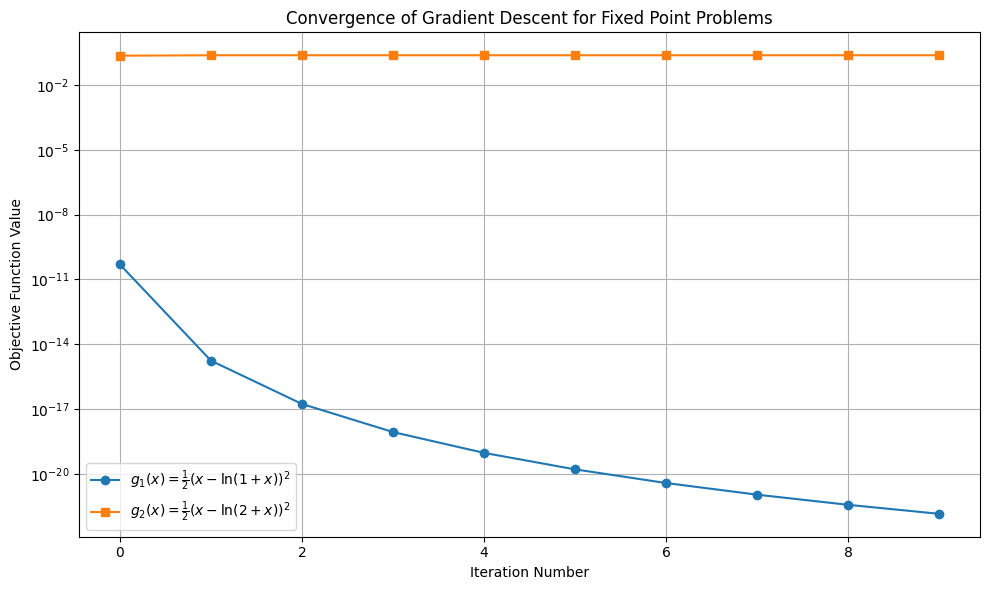

In [43]:
plt.figure(figsize=(10, 6))
plt.plot([g1(itereation) for itereation in history], label=r"$g_1(x)=\frac{1}{2}(x-\ln(1+x))^2$", marker="o")
plt.plot([g2(itereation) for itereation in history2], label=r"$g_2(x)=\frac{1}{2}(x-\ln(2+x))^2$", marker="s")
plt.xlabel("Iteration Number")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Gradient Descent for Fixed Point Problems")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Інтерпретація результатів

- **Для $ g_1(x) = \tfrac{1}{2}(x - \ln(1 + x))^2 $:** алгоритм швидко зменшує значення цільової функції, досягаючи порядку $10^{-20}$ вже після 10 ітерацій. Це свідчить про ефективну збіжність до мінімуму, що відповідає фіксованій точці рівняння $\ln(1+x) = x$. 

- **Для $ g_2(x) = \tfrac{1}{2}(x - \ln(2 + x))^2 $:** значення функції практично не змінюється, залишаючись близько $10^{-2}$. Це означає, що градієнтний спуск або не збігається, або стартова точка знаходиться дуже далеко від істинного мінімуму. 

- **На графіку** чітко видно різку різницю в збіжності: $ g_1(x) $ швидко прямує до нуля, тоді як $ g_2(x) $ залишається майже незмінним. 

- Основна причина різниці в збіжності — **відмінність у формі функцій** та **вибір початкової точки**. Для $ g_2(x) $ можливо, використаний крок градієнтного спуску не дозволяє ефективно мінімізувати функцію.